<a href="https://colab.research.google.com/github/priyadarsh99/MachineLearning-Projects/blob/main/Titanic_Logistic_Regression_Github_Using_Median_for_Missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem: To build a Model which classifies whether a passenger survived the shipwreck or not on the basis of the information provided**

###**Importing Packages**

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
#importing logisticregression as it is a classfication problem

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/titanic-training-data.csv')
#loading the dataset

###**Getting some insights about the dataset**

In [46]:
df.shape
#number of rows and columns in teh dataset

(891, 12)

In [47]:
df.columns
#various features present in the dataset

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [48]:
df.head()
#first 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.info()
#number of entries in each feature and it's data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###**Visualising the Dataset**

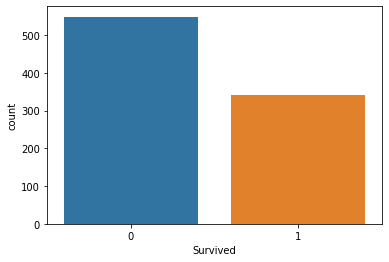

In [50]:
sns.countplot(x='Survived',data=df)
#number of people survived the shipwreck

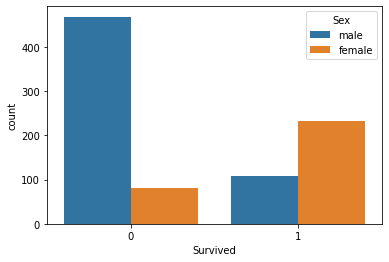

In [51]:
sns.countplot(x='Survived',hue='Sex',data=df)
#number of male and female passengers survived the shipwreck

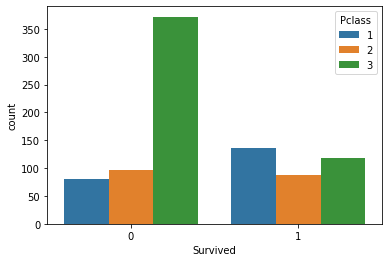

In [52]:
sns.countplot(x='Survived',hue='Pclass',data=df)
#number of passengers survived from respective passenger class

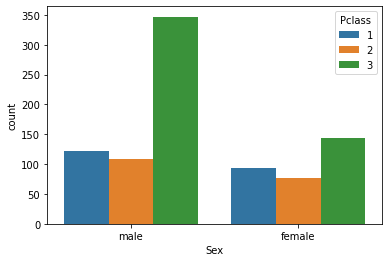

In [53]:
sns.countplot(x='Sex',hue='Pclass',data=df)
#number of male and female passenger survived in the respective passenger class

####**From the above countplot we can conclude that male passengeres prefered the third passenger class and the least survival rate is from the third class where male passengers were in majority**

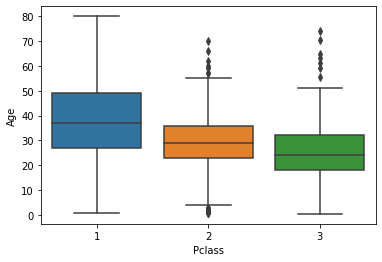

In [54]:
sns.boxplot(x='Pclass',y='Age',data=df)

###**Detecting Missing Values**

In [55]:
df.info()
#shows the number of missing value as well as datatype of features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
df.isnull().sum()
#total count of missing values in respective columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

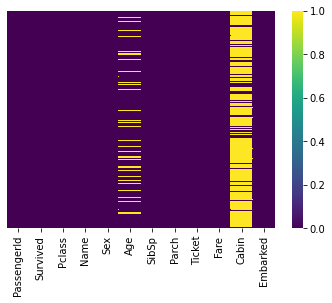

In [57]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')
#heatmap confirms the missing values in the dataset

###**One-Hot Encoding**

In [58]:
sex = pd.get_dummies(df['Sex'])
#creating one-hot encoding for gender
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [59]:
sex = sex.drop('female',axis =1)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [60]:
embark = pd.get_dummies(df['Embarked'],drop_first=True)
#one-hot encoding for embarked column
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [61]:
pclass = pd.get_dummies(df['Pclass'],drop_first=True)
#one-hot encoding for passenger class column
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [62]:
df = pd.concat([df,sex,embark,pclass],axis =1)
#concatenating the one-hot encoded columns to main dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,1


In [63]:
df = df.drop(['PassengerId','Name','Pclass','Sex','Ticket','Fare','Cabin','Embarked'],axis = 1)
df.head()
#dropping those columns which are not relevant

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


In [64]:
df.sample(10)
#missing values are in the form of NaN

,Survived,Age,SibSp,Parch,male,Q,S,2,3
197,0,42.0,0,1,1,0,1,0,1
611,0,NaN,0,0,1,0,1,0,1
206,0,32.0,1,0,1,0,1,0,1
211,1,35.0,0,0,0,0,1,1,0
503,0,37.0,0,0,0,0,1,0,1
260,0,NaN,0,0,1,1,0,0,1
595,0,36.0,1,1,1,0,1,0,1
384,0,NaN,0,0,1,0,1,0,1
341,1,24.0,3,2,0,0,1,0,0
187,1,45.0,0,0,1,0,1,0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   male      891 non-null    uint8  
 5   Q         891 non-null    uint8  
 6   S         891 non-null    uint8  
 7   2         891 non-null    uint8  
 8   3         891 non-null    uint8  
dtypes: float64(1), int64(3), uint8(5)
memory usage: 32.3 KB


In [66]:
df.isnull().sum()

Survived      0
Age         177
SibSp         0
Parch         0
male          0
Q             0
S             0
2             0
3             0
dtype: int64

###**Using Median to replace the missing values in the Age column**

In [67]:
df.median()

Survived     0.0
Age         28.0
SibSp        0.0
Parch        0.0
male         1.0
Q            0.0
S            1.0
2            0.0
3            1.0
dtype: float64

In [68]:
median_filler = lambda x: x.fillna(x.median())
df = df.apply(median_filler,axis = 0)
#replacing the NaN values with median 

In [69]:
df.sample(10)
#all the missing values are replaced with median

,Survived,Age,SibSp,Parch,male,Q,S,2,3
444,1,28.0,0,0,1,0,1,0,1
494,0,21.0,0,0,1,0,1,0,1
356,1,22.0,0,1,0,0,1,0,0
131,0,20.0,0,0,1,0,1,0,1
642,0,2.0,3,2,0,0,1,0,1
590,0,35.0,0,0,1,0,1,0,1
749,0,31.0,0,0,1,1,0,0,1
262,0,52.0,1,1,1,0,1,0,0
533,1,28.0,0,2,0,0,0,0,1
609,1,40.0,0,0,0,0,1,0,0


In [70]:
df.isnull().sum()
#no missing values are left

Survived    0
Age         0
SibSp       0
Parch       0
male        0
Q           0
S           0
2           0
3           0
dtype: int64

###**Splitting of the DataSet for training and testing data**

In [71]:
x = df.drop('Survived',axis =1)
y = df['Survived']

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=4)
X_train.shape, X_test.shape
#using train_test_split to split the dataset into training and testing data

((623, 8), (268, 8))

###**Applying Logistic Regression Model**

In [73]:
lg_model = LogisticRegression()
lg_model.fit(X_train,Y_train)
#fitting the model with training data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression()

In [74]:
y_pred_train = lg_model.predict(X_train)
lg_model.score(X_train,Y_train)
#checking the accuracy of the model with training data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.7929373996789727

In [75]:
y_pred_test = lg_model.predict(X_test)
lg_model.score(X_test,Y_test)
#checking the accuracy of the model with testing data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8208955223880597

###**Visualising the Accuracy of the Model on the test data**

In [76]:
from sklearn import metrics 
print(metrics.classification_report(Y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       178
           1       0.74      0.71      0.73        90

    accuracy                           0.82       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268



In [77]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(Y_test,y_pred_test)
#displaying the confusion matrix

array([[156,  22],
       [ 26,  64]])

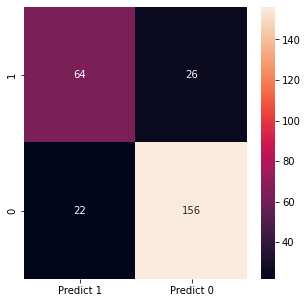

In [78]:
cm = metrics.confusion_matrix(Y_test,y_pred_test,labels=[1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ['1','0']],columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm,annot=True,fmt = 'g')
#displaying the confusion matrix with the help of heatmap

####**Now we'll use SVM Model as it has better accuracy than LogisticRegression Model**

###**SVM Model**

In [79]:
from sklearn import svm
#importing the svm model

In [80]:
clf = svm.SVC(gamma=0.0005,C = 12)
#giving the parameters gamma and c value to the model

In [81]:
clf.fit(X_train,Y_train)
#fitting the model with training data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


SVC(C=12, gamma=0.0005)

In [82]:
from sklearn.metrics import accuracy_score
pred_train = clf.predict(X_train)
accuracy_score(Y_train,pred_train)
#checking accuracy of the svm model with training data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8025682182985554

In [83]:
pred = clf.predict(X_test)
accuracy_score(Y_test,pred)
#checking accuracy of svm model with testing data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8395522388059702